In [1]:
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import time
import pandas as pd

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

font_size = 10

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign
centimeter = 1/2.54  # centimeter in inches

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=400, dpi_save=400, figsize=(6,6), fontsize = 10, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==1.1.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
from _utils import get_adata, update_celltype,set_cell2loc_palette
import edge


In [5]:
sample_list=['CDQ_C3','CDQ_D4','CDQ_E3','CXF_D1','HX_D3','LJT_F6','TJ_E4','GXY_F3','ZZW_F5']
adata_paths = [r'/hwfssz1/ST_HEALTH/P20Z10200N0170/jiangyongchao/project/HX_lung/cell2loc/'+pat_id+'_bin100.leiden.cell2location.gzip.h5ad' 
               for pat_id in sample_list]
adata_fnames = dict(zip(sample_list, adata_paths))


In [6]:
pat_id = 'ZZW_F5' #IA
adata=get_adata(adata_fnames[pat_id], log=True)

normalizing counts per cell
    finished (0:00:07)


In [7]:
adata

AnnData object with n_obs × n_vars = 30170 × 13372
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    layers: 'count', 'no

In [8]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']
update_celltype(adata,celltype_list,min_frac_ct=1.2, update_cell2loc=True)


In [9]:
adata

AnnData object with n_obs × n_vars = 30170 × 13372
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'cell_type_update'
    

In [10]:
adata.obsm['cell_type_update']

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,Fibroblast,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update
cell_name,,,,,,,,,,,,,,,,,,,,
100-100,0.068234,0.093404,0.289444,0.016594,0.028751,0.043700,0.074865,0.085132,0.006403,0.033940,0.050522,0.031320,0.032983,0.082356,0.027384,0.034969,1,2,3.098853,AT2_like
100-101,0.071395,0.133045,0.288331,0.021834,0.029828,0.033481,0.071309,0.081311,0.007486,0.028796,0.046897,0.021372,0.023111,0.083278,0.026470,0.032058,1,2,2.167171,AT2_like
100-102,0.049987,0.140221,0.274904,0.020834,0.020662,0.041869,0.067199,0.073765,0.032446,0.032361,0.026527,0.043693,0.025526,0.086488,0.031378,0.032139,1,2,1.960502,AT2_like
100-103,0.091374,0.094059,0.251345,0.024017,0.050638,0.037595,0.069688,0.073759,0.015708,0.033502,0.052184,0.027012,0.030463,0.071832,0.031484,0.045340,1,2,2.672213,AT2_like
100-104,0.052639,0.142525,0.274375,0.025665,0.038566,0.044581,0.078217,0.083370,0.017016,0.029230,0.033451,0.028074,0.023789,0.051475,0.034701,0.042328,1,2,1.925101,AT2_like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99-95,0.053687,0.152111,0.284940,0.014628,0.035682,0.028452,0.069286,0.088190,0.015719,0.031383,0.034526,0.037318,0.025659,0.065510,0.026924,0.035984,1,2,1.873230,AT2_like
99-96,0.091700,0.099699,0.253322,0.026540,0.022208,0.032954,0.068468,0.079450,0.011292,0.026369,0.057189,0.030733,0.029533,0.102603,0.027416,0.040523,13,2,2.468947,AT2_like
99-97,0.062825,0.102070,0.234414,0.032519,0.034977,0.054389,0.062298,0.092549,0.015910,0.027315,0.077038,0.032173,0.028524,0.092065,0.021967,0.028967,1,2,2.296603,AT2_like


In [11]:
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map)


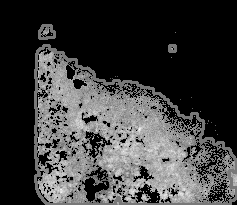

In [12]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

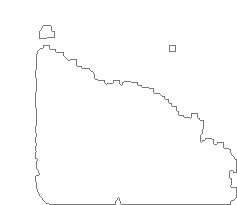

In [13]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

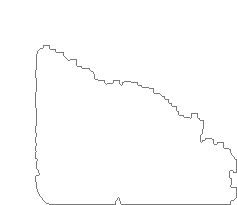

In [14]:
smoothed_b = edge.smooth_boundary([boundary[0]], factor=0.00001) # 0.002

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)


In [15]:
def _filter_line(bound_ploy, x_left, x_right, y_bottom, y_top):
    """
    x_left < x_right
    y_bottom > y_top
    """
    u_bound = []
    for x,y in zip(bound_ploy.boundary.xy[0],bound_ploy.boundary.xy[1]):
        if (x > x_left and y > y_top) and (x < x_right and y < y_bottom):
            u_bound.append([x,y])
    return np.array(u_bound)

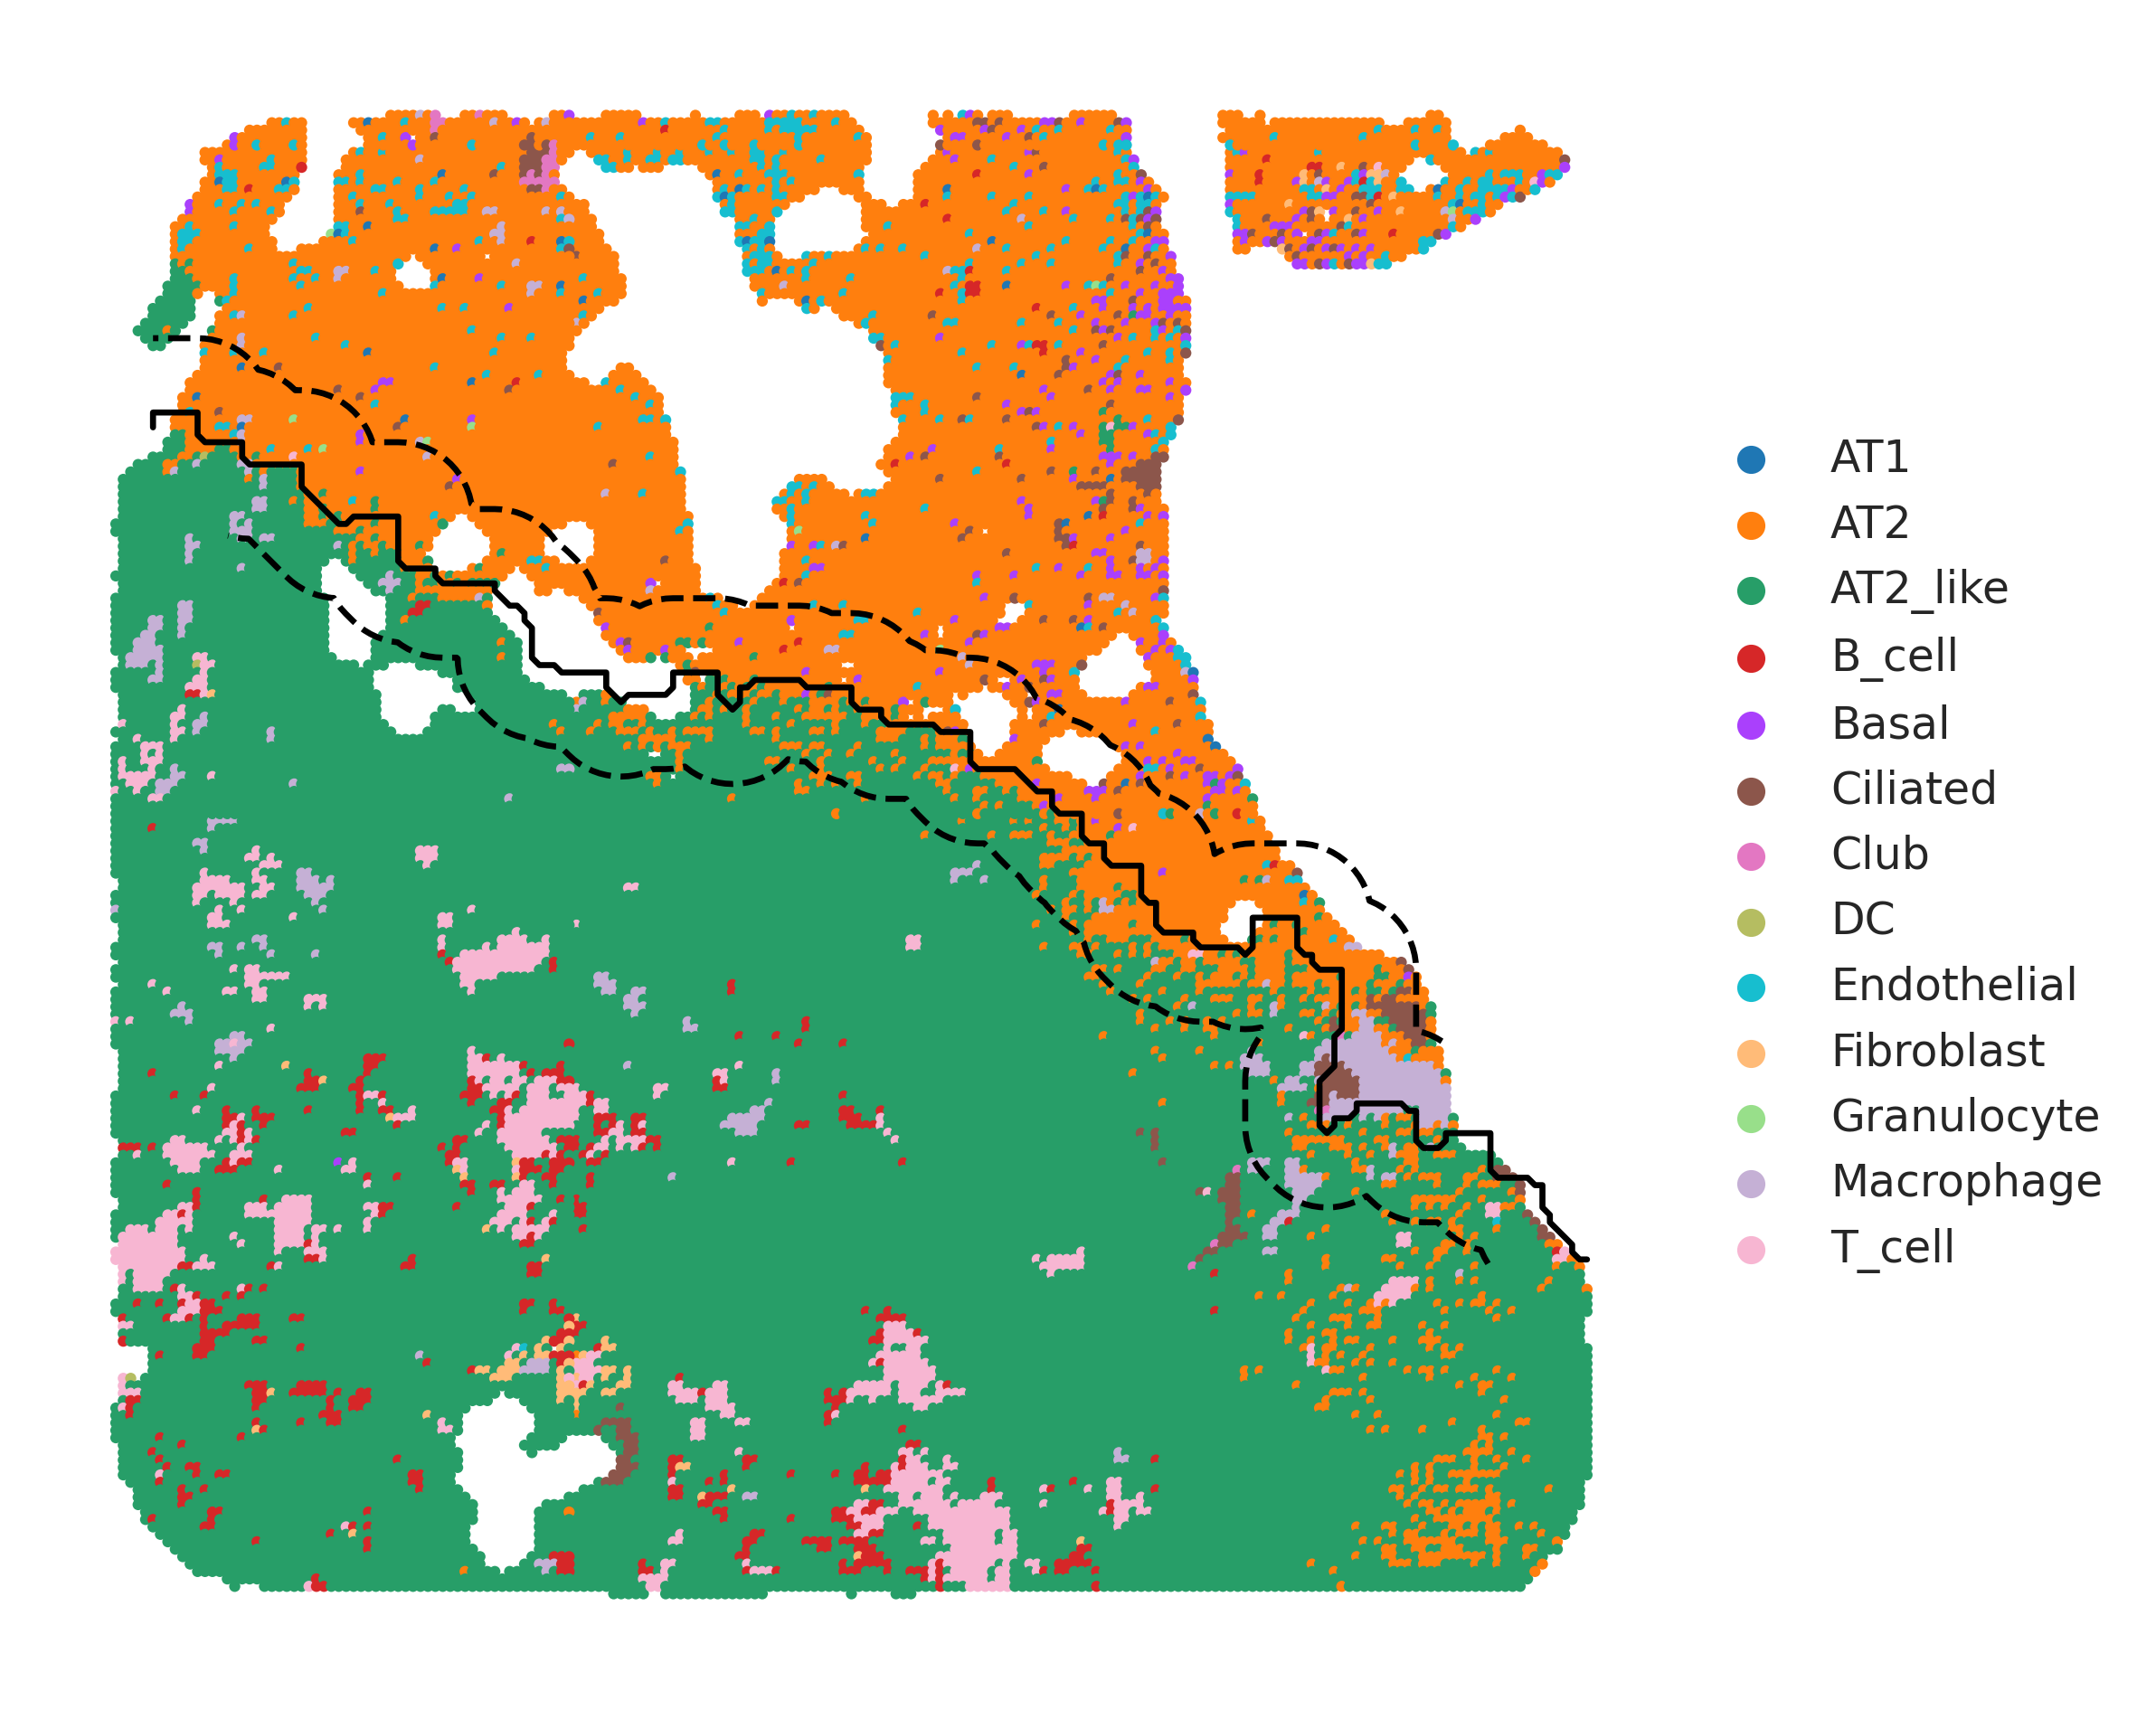

In [18]:
# draw plot to show boundary
# distance = 10, equal to 500 mum
roi_b = smoothed_b[0]
o_b, f_b, b_b = edge.find_distance_boundary(roi_b, distance=10)

fig,ax = plt.subplots(figsize=(6,6))
sc.pl.spatial(adata, color=['cell2location_max'], title='', spot_size=1.5,frameon = False, show=False, ax=ax, palette = set_cell2loc_palette(celltype_list))

x_left, x_right = ax.get_xlim()
y_bottom, y_top = ax.get_ylim()

ob_b = _filter_line(o_b, x_left+15, x_right-10, y_bottom-50, y_top+10)
fb_b = _filter_line(f_b, x_left+15, x_right-30, y_bottom-50, y_top+10)
bb_b = _filter_line(b_b, x_left+25, x_right-10, y_bottom-55, y_top+10)

ax.plot(ob_b[:,0],ob_b[:,1], color='black')
ax.plot(fb_b[:,0],fb_b[:,1], color='black', linestyle='dashed')
ax.plot(bb_b[:,0],bb_b[:,1], color='black', linestyle='dashed')

plt.savefig(f"results/edge/boundary_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

In [19]:
from shapely.geometry import Point
coords = adata.obsm['spatial']
coords_pt = list(map(Point, zip(coords[:,0],coords[:,1])))

def get_pt_btw_boundary(coords_pt, outer_b, in_b):
    return np.array([1 if outer_b.contains(i) and not in_b.contains(i) else 0 for i in coords_pt])

In [20]:
distances = [5, 10, 15, 20]

o_b, f_b_p5, b_b_m5 = edge.find_distance_boundary(roi_b, distance=5)
_, f_b_p10, b_b_m10 = edge.find_distance_boundary(roi_b, distance=10)
_, f_b_p15, b_b_m15 = edge.find_distance_boundary(roi_b, distance=15)
_, f_b_p20, b_b_m20 = edge.find_distance_boundary(roi_b, distance=20)

_, f_b_p25, b_b_m25 = edge.find_distance_boundary(roi_b, distance=25)

pt_in_p5_ob = get_pt_btw_boundary(coords_pt, f_b_p5, o_b)
pt_in_p10_p5 = get_pt_btw_boundary(coords_pt, f_b_p10, f_b_p5)
pt_in_p15_p10 = get_pt_btw_boundary(coords_pt, f_b_p15, f_b_p10)
pt_in_p20_p15 = get_pt_btw_boundary(coords_pt, f_b_p20, f_b_p15)
pt_in_p25_p20 = get_pt_btw_boundary(coords_pt, f_b_p25, f_b_p20)

pt_in_m5_ob = get_pt_btw_boundary(coords_pt, o_b, b_b_m5)
pt_in_m10_m5 = get_pt_btw_boundary(coords_pt, b_b_m5, b_b_m10)
pt_in_m15_m10 = get_pt_btw_boundary(coords_pt, b_b_m10, b_b_m15)
pt_in_m20_m15 = get_pt_btw_boundary(coords_pt, b_b_m15, b_b_m20)
pt_in_m25_m20 = get_pt_btw_boundary(coords_pt, b_b_m20, b_b_m25)


In [21]:
adata_p5_ob = adata[pt_in_p5_ob==1,:]
adata_p10_p5 = adata[pt_in_p10_p5==1,:]
adata_p15_p10 = adata[pt_in_p15_p10==1,:]
adata_p20_p15 = adata[pt_in_p20_p15==1,:]

adata_p25_p20 = adata[pt_in_p25_p20==1,:]

adata_m5_ob = adata[pt_in_m5_ob==1,:]
adata_m10_m5 = adata[pt_in_m10_m5==1,:]
adata_m15_m10 = adata[pt_in_m15_m10==1,:]
adata_m20_m15 = adata[pt_in_m20_m15==1,:]

adata_m25_m20 = adata[pt_in_m25_m20==1,:]

In [22]:
adas = [adata_p5_ob, adata_p10_p5, adata_p15_p10, adata_p20_p15,adata_p25_p20, adata_m5_ob, adata_m10_m5, adata_m15_m10, adata_m20_m15,adata_m25_m20]
dist_lab = ['0-5','5-10','10-15','15-20','20-25', '-5-0', '-10--5','-15--10','-20--15','-25--20']
# dist_lab = [-1,-2,-3, -4, 1, 2, 3 , 4]
# orders = ['15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15']

df_cell_type_frac_regs=None
for i, ada in enumerate(adas):
    if i==0:
        df_cell_type_frac = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac['region'] = [dist_lab[i]] * df_cell_type_frac.shape[0]
        df_cell_type_frac_regs = df_cell_type_frac
    else:
        df_cell_type_frac1 = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac1['region'] = [dist_lab[i]] * df_cell_type_frac1.shape[0]
        df_cell_type_frac_regs = pd.concat([df_cell_type_frac_regs, df_cell_type_frac1], ignore_index=True)


In [23]:
import pickle
with open(f'results/edge/adatas_{pat_id}.pkl','wb') as f:
    pickle.dump(adas, f)

In [24]:
df_cell_type_frac_regs[df_cell_type_frac_regs.region=='-20--15']

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,...,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update,region
12803,0.068234,0.093404,0.289444,0.016594,0.028751,0.043700,0.074865,0.085132,0.006403,0.033940,...,0.031320,0.032983,0.082356,0.027384,0.034969,1,2,3.098853,AT2_like,-20--15
12804,0.071395,0.133045,0.288331,0.021834,0.029828,0.033481,0.071309,0.081311,0.007486,0.028796,...,0.021372,0.023111,0.083278,0.026470,0.032058,1,2,2.167171,AT2_like,-20--15
12805,0.049987,0.140221,0.274904,0.020834,0.020662,0.041869,0.067199,0.073765,0.032446,0.032361,...,0.043693,0.025526,0.086488,0.031378,0.032139,1,2,1.960502,AT2_like,-20--15
12806,0.091374,0.094059,0.251345,0.024017,0.050638,0.037595,0.069688,0.073759,0.015708,0.033502,...,0.027012,0.030463,0.071832,0.031484,0.045340,1,2,2.672213,AT2_like,-20--15
12807,0.081696,0.120846,0.285467,0.011159,0.025408,0.027601,0.069203,0.079956,0.019920,0.036258,...,0.033889,0.031696,0.086162,0.027664,0.033497,1,2,2.362230,AT2_like,-20--15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15177,0.053458,0.164527,0.250301,0.021461,0.024288,0.050564,0.071654,0.060616,0.036221,0.031418,...,0.035903,0.032214,0.072644,0.031975,0.033360,1,2,1.521338,AT2_like,-20--15
15178,0.079870,0.105007,0.292662,0.017771,0.025402,0.038514,0.074154,0.079488,0.012354,0.030919,...,0.031760,0.035491,0.081933,0.029399,0.037970,1,2,2.787062,AT2_like,-20--15
15179,0.056376,0.152915,0.270181,0.024962,0.036069,0.037732,0.062865,0.072964,0.013117,0.032660,...,0.031300,0.020866,0.079985,0.032573,0.043454,1,2,1.766865,AT2_like,-20--15
15180,0.062116,0.125641,0.230641,0.014095,0.030279,0.040002,0.076213,0.104315,0.021219,0.032065,...,0.026417,0.039251,0.068843,0.030470,0.050027,1,2,1.835714,AT2_like,-20--15


In [25]:
df_cell_type_frac_regs.to_csv(f"results/edge/cell_boundary_{pat_id}.csv", index=False)

In [26]:
from matplotlib import cm, colors
x = list(map(colors.to_hex, sns.color_palette('pastel')))
print(x)
x = list(map(colors.to_hex, sns.color_palette('bright')))
print(x)


['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


In [27]:
# bg_f = ['#b9f2f0', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#fffea3', ]
# ln_f = ['#00d7ff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#ffc400', ]
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']

In [28]:
sns.color_palette(x)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [29]:
import plotting

In [30]:
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

def plot_show(df_cell_type_frac_regs, val_col, save=True, y_label='Fraction of Cell Type', gene=False, gene_cell_type=None, bg_f=bg_f, ln_f=ln_f):
    
    comp_pairs = [('20-25','15-20'),('15-20','10-15'),('10-15','5-10'),('5-10','0-5'), ('0-5','-5-0'), 
                  ('-5-0','-10--5'), ('-10--5','-15--10'),('-15--10','-20--15'),('-20--15','-25--20')]
    orders = ['20-25','15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15','-25--20']

    fig = plt.figure(figsize=(4.5,3.2))
    gs1 = GridSpec(2, 1, hspace=0.3,height_ratios=[8, 1.2])
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    axa = plotting.boxplot(df_cell_type_frac_regs, 'region', val_col, ax1, comp_pairs,orders=orders, gene=gene,bg_f=bg_f, ln_f=ln_f)

    ax1.axvline(4.5,linewidth=0.8, color='gray', linestyle='dashed',ymax=0.6)
    ax1.tick_params(pad=1)
    ax1.set_xticklabels(
        labels=['-1250 $\mu$m','-1000 $\mu$m','-750 $\mu$m','-500 $\mu$m','-250 $\mu$m','250 $\mu$m','500 $\mu$m','750 $\mu$m','1000 $\mu$m','1250 $\mu$m'], rotation=20,ha='center', va='top')
    ax1.set_xlabel(None)
    ax1.set_ylabel(y_label)
    if not gene:
        ax1.set_title(val_col)
    else:
        ax1.set_title(f'$\it{val_col}$')

    p = patches.FancyArrowPatch((0, 0.5), (1, 0.5), arrowstyle='<|-|>', mutation_scale=10,color='k')
    ax2.add_patch(p)
    ax2.plot([0.5,0.5],[0.5016,0.51],color='k')
    ax2.text(0.15, 0.472, 'Normal', ha='center', va='center')
    ax2.text(0.5, 0.472, 'Boundary', ha='center', va='center')
    ax2.text(0.85, 0.472, 'Tumor',  ha='center', va='center')
    ax2.axis('off')
    sns.despine()
    if save:
        if gene:
            plt.savefig(f"results/edge/{gene_cell_type}_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')
        else:
            plt.savefig(f"results/edge/ct_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.751e-02 U_stat=2.714e+05
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.638e-04 U_stat=3.275e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.313e-05 U_stat=4.164e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.738e-36 U_stat=7.531e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.807e-130 U_stat=2.571e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.008e-14 U_stat=4.644e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correc

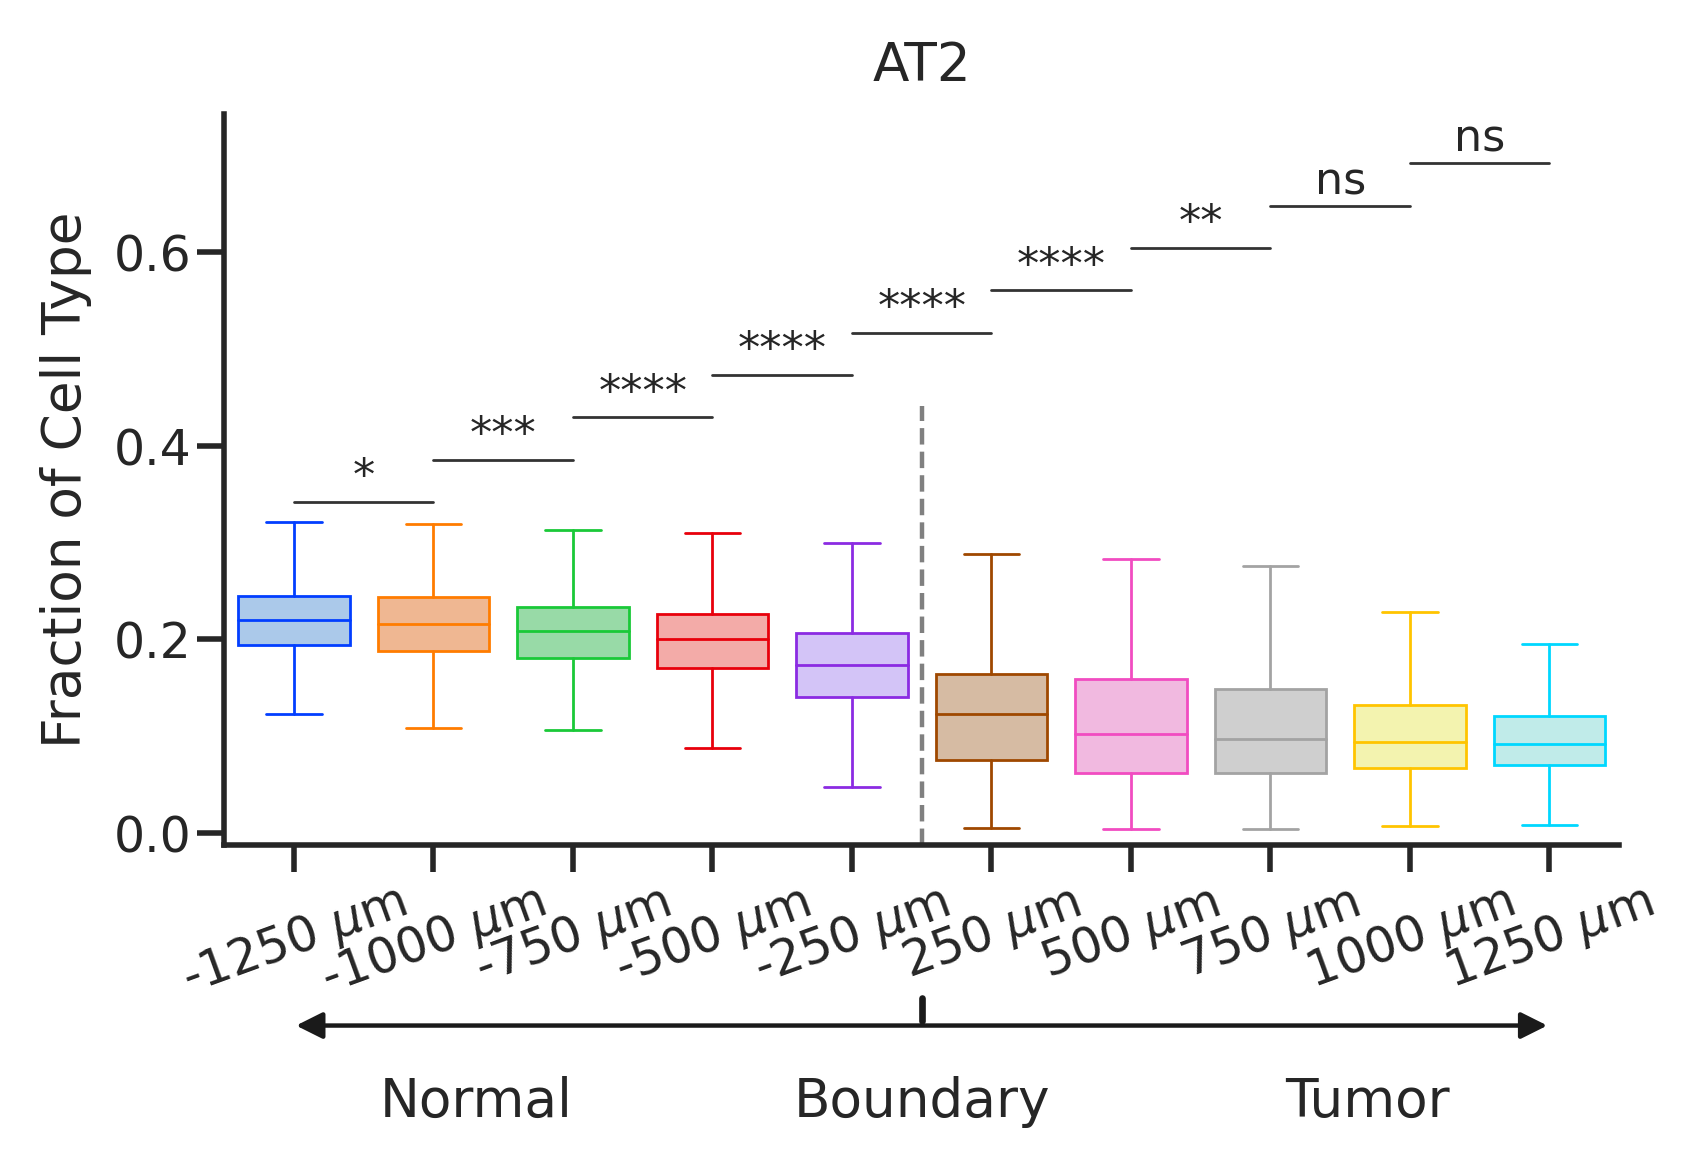

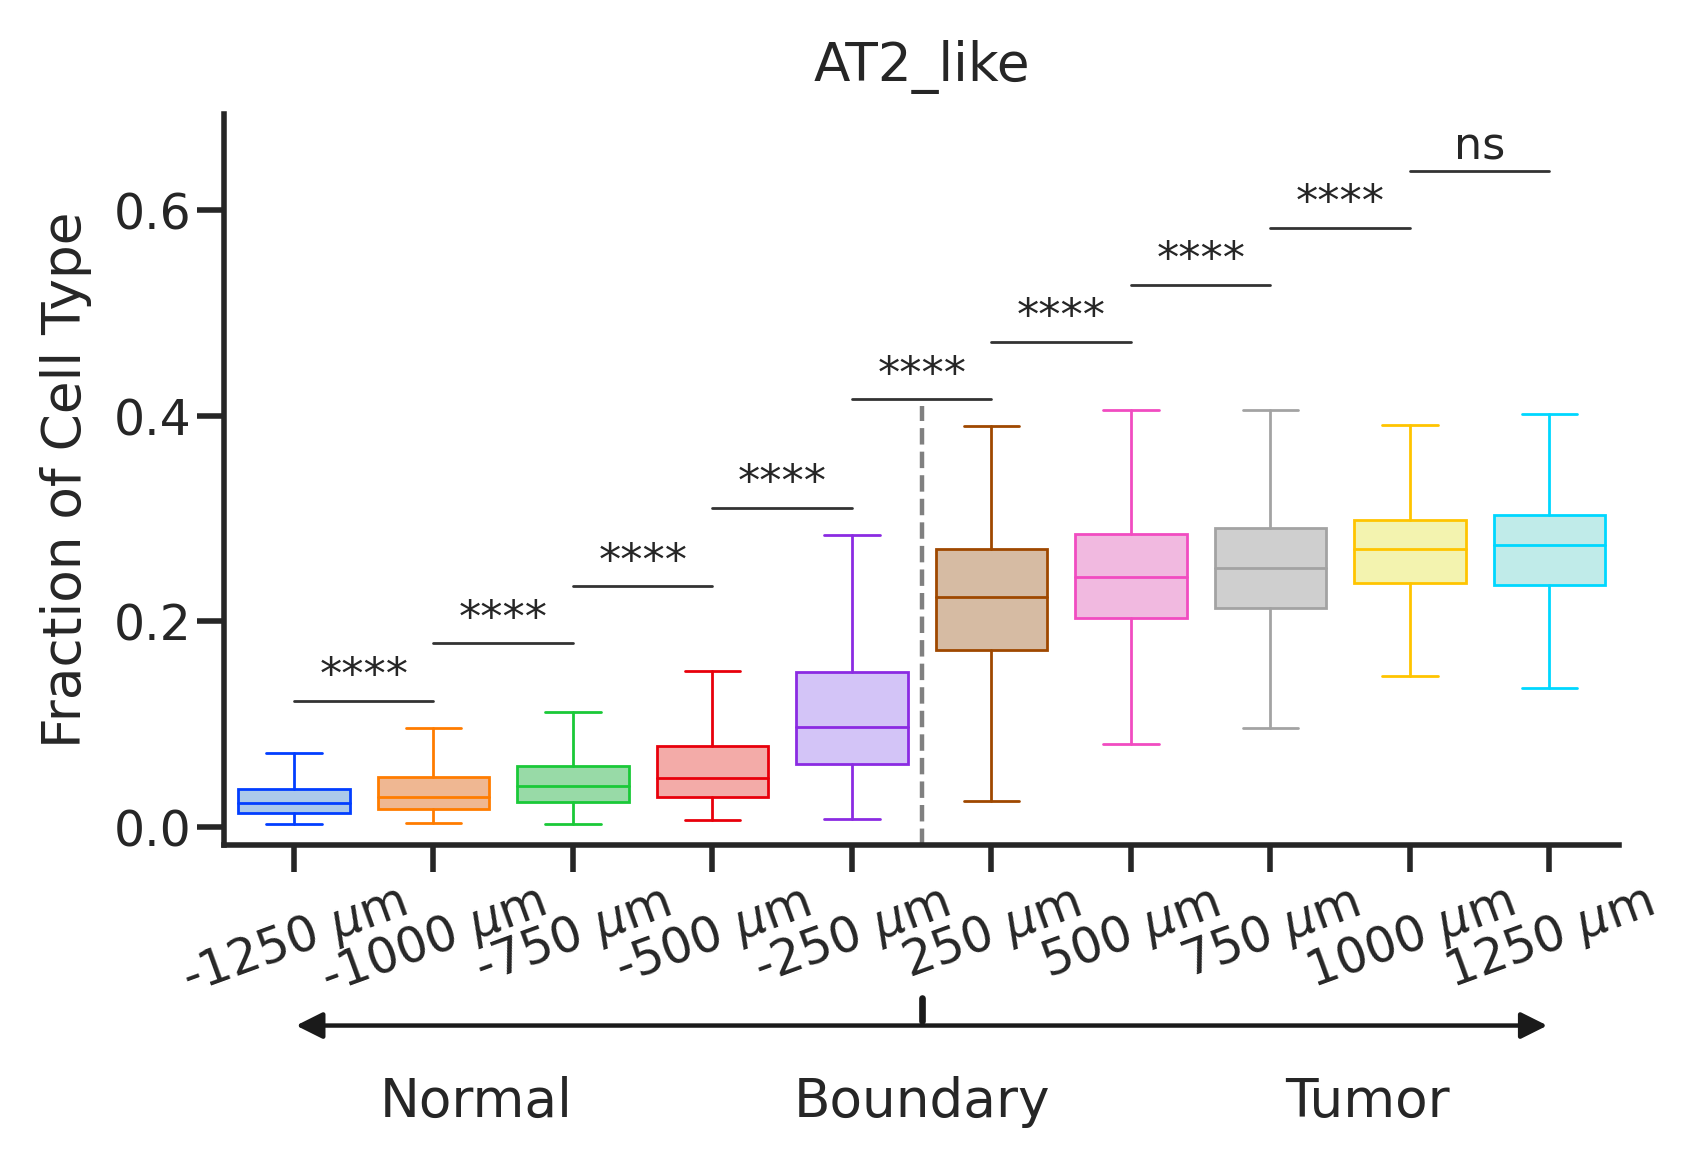

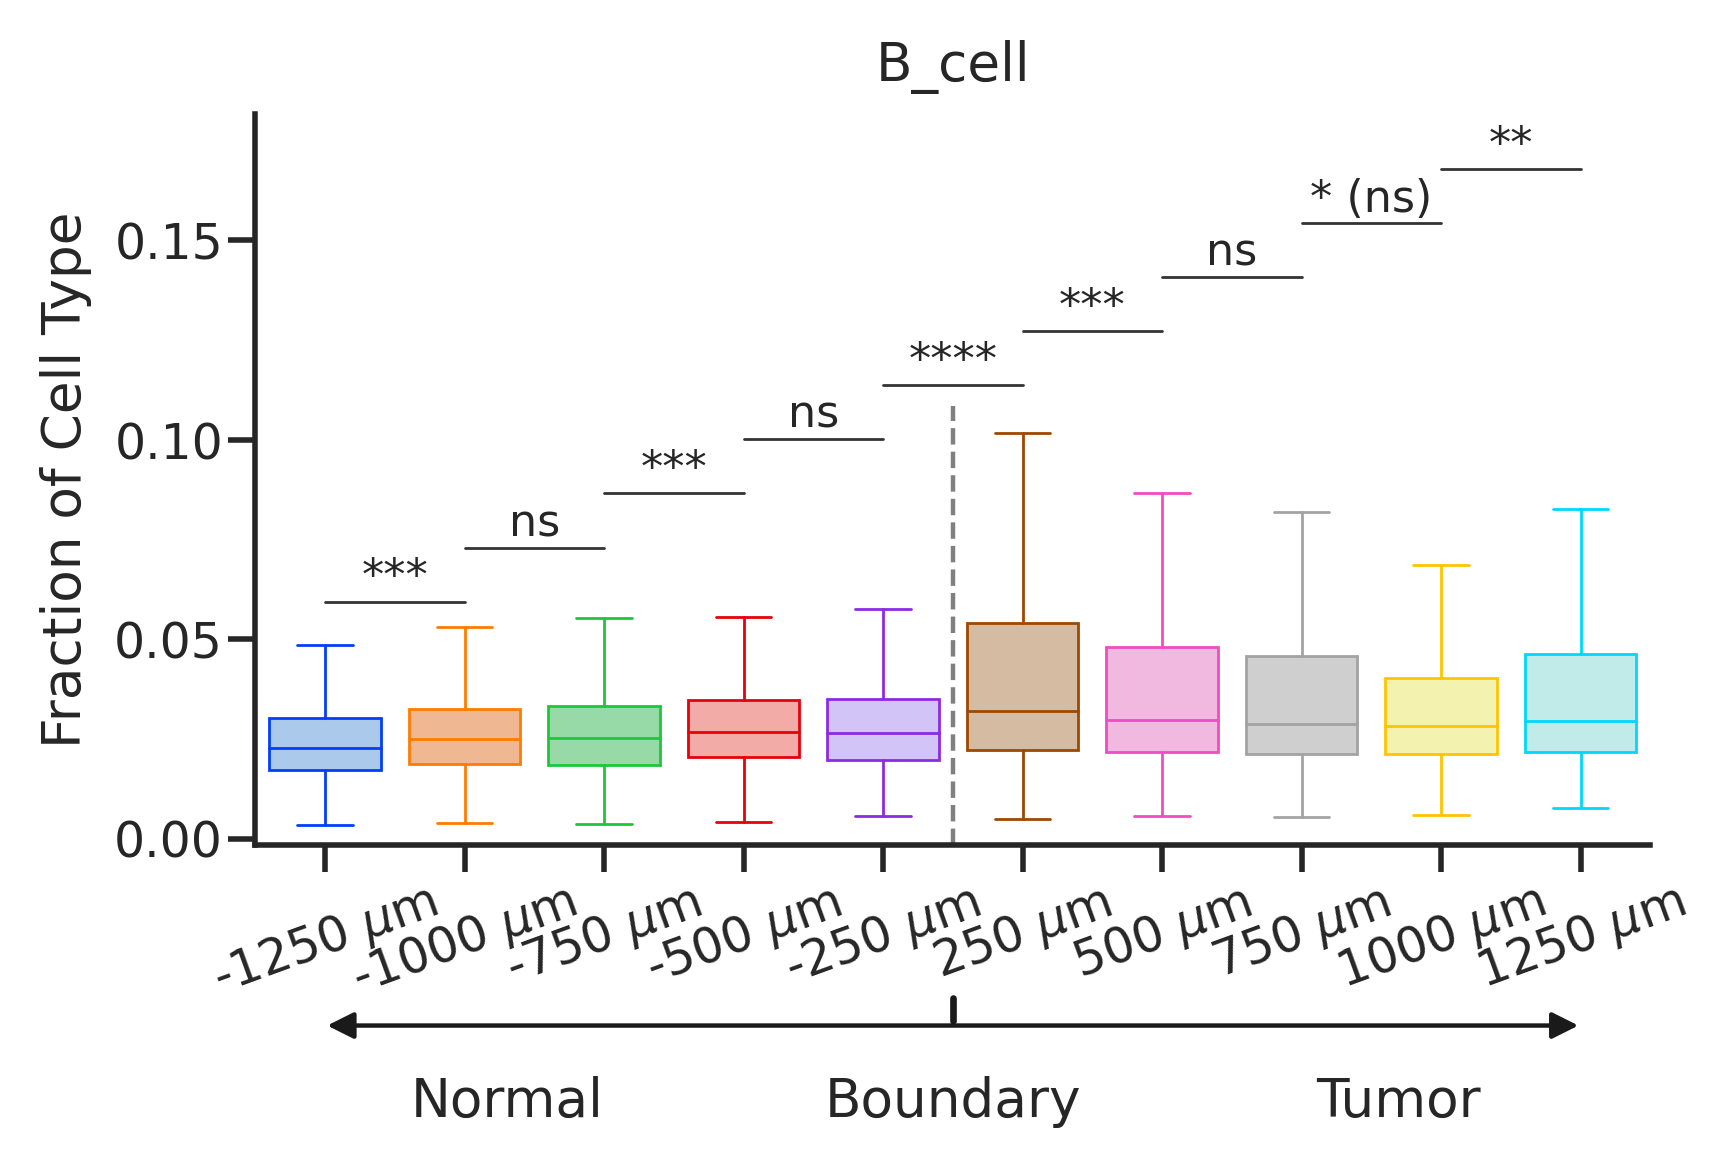

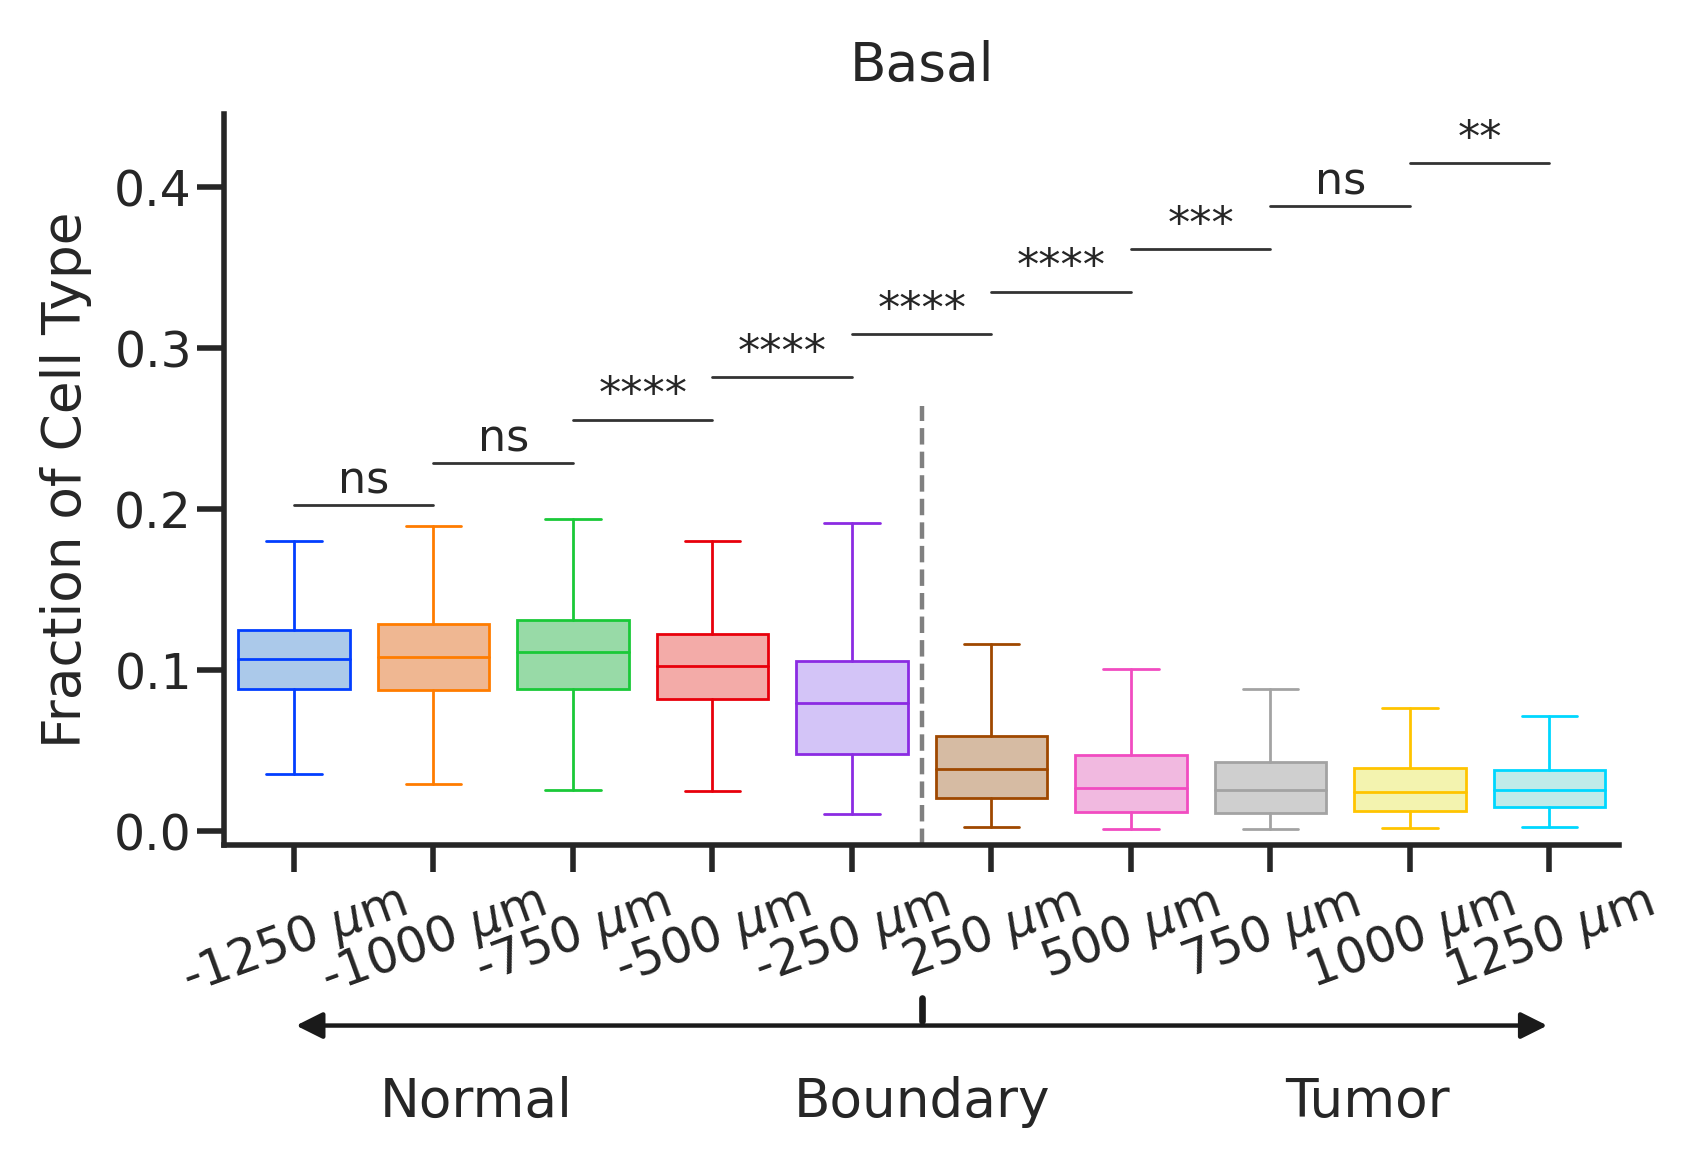

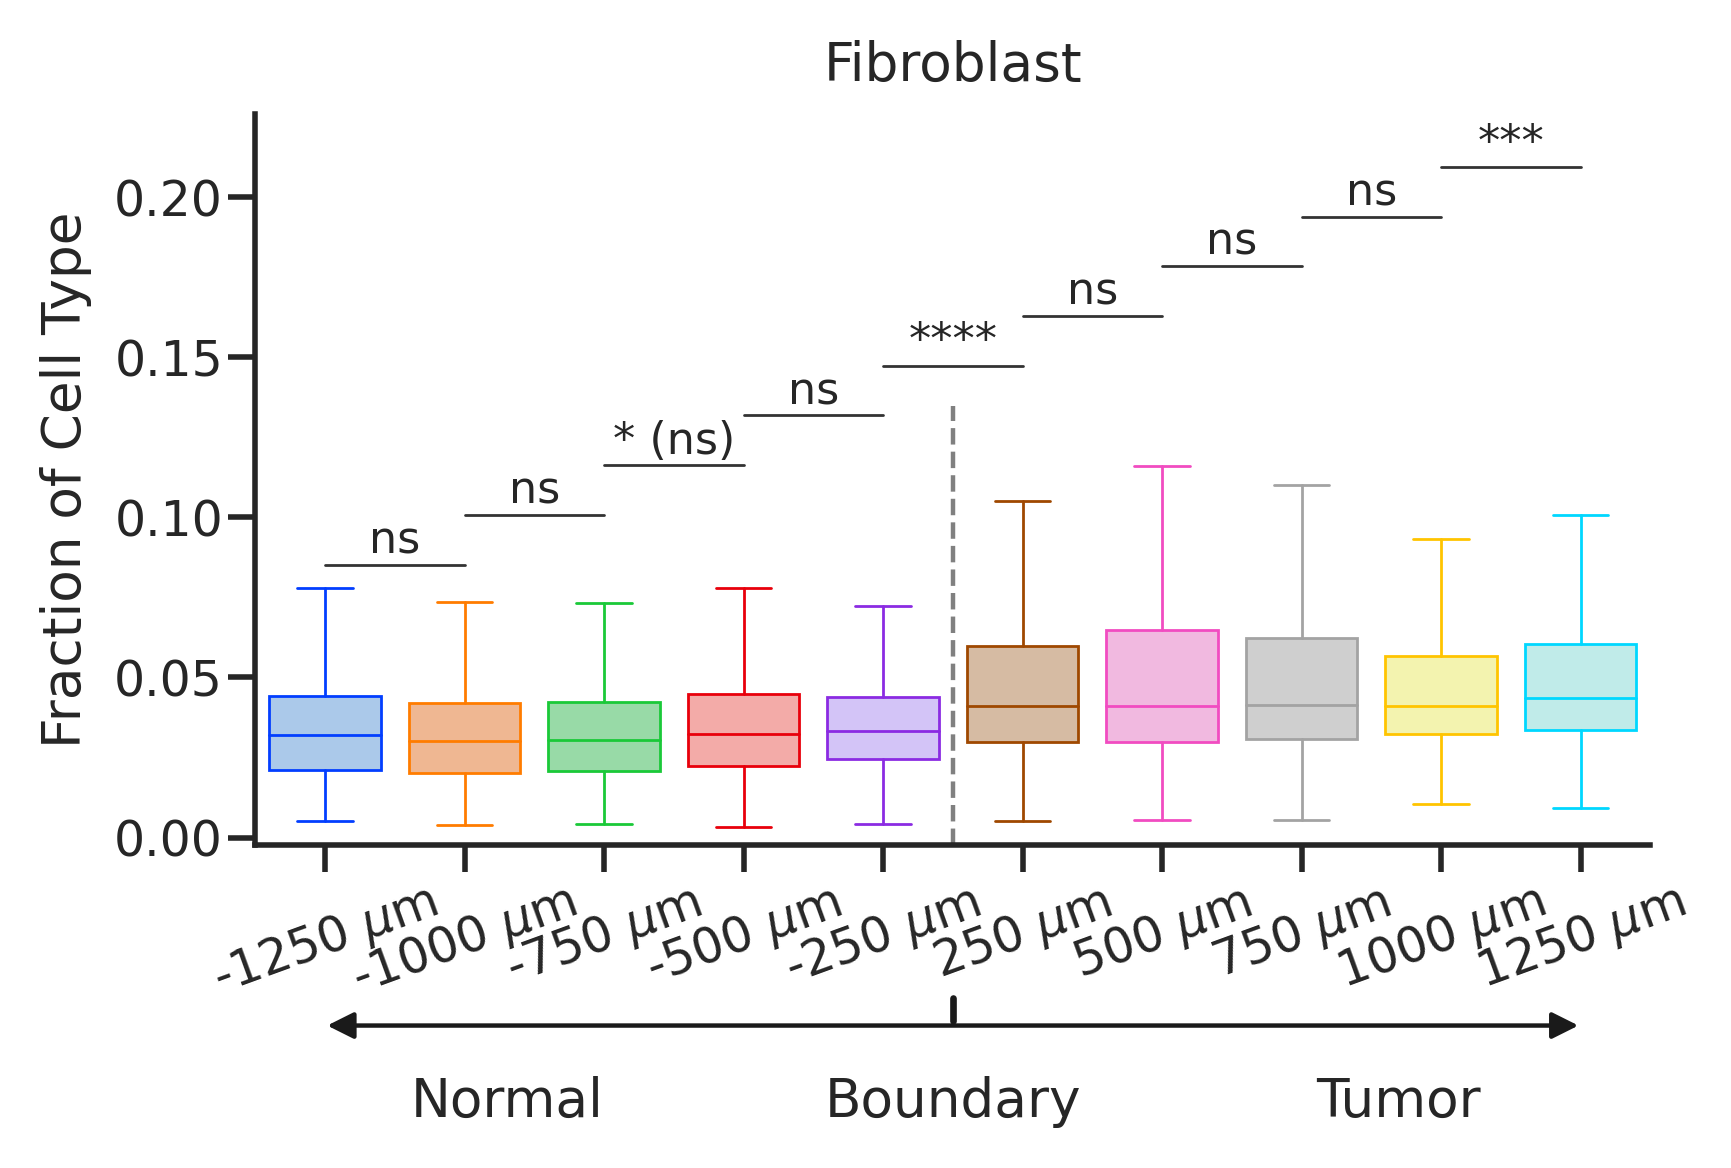

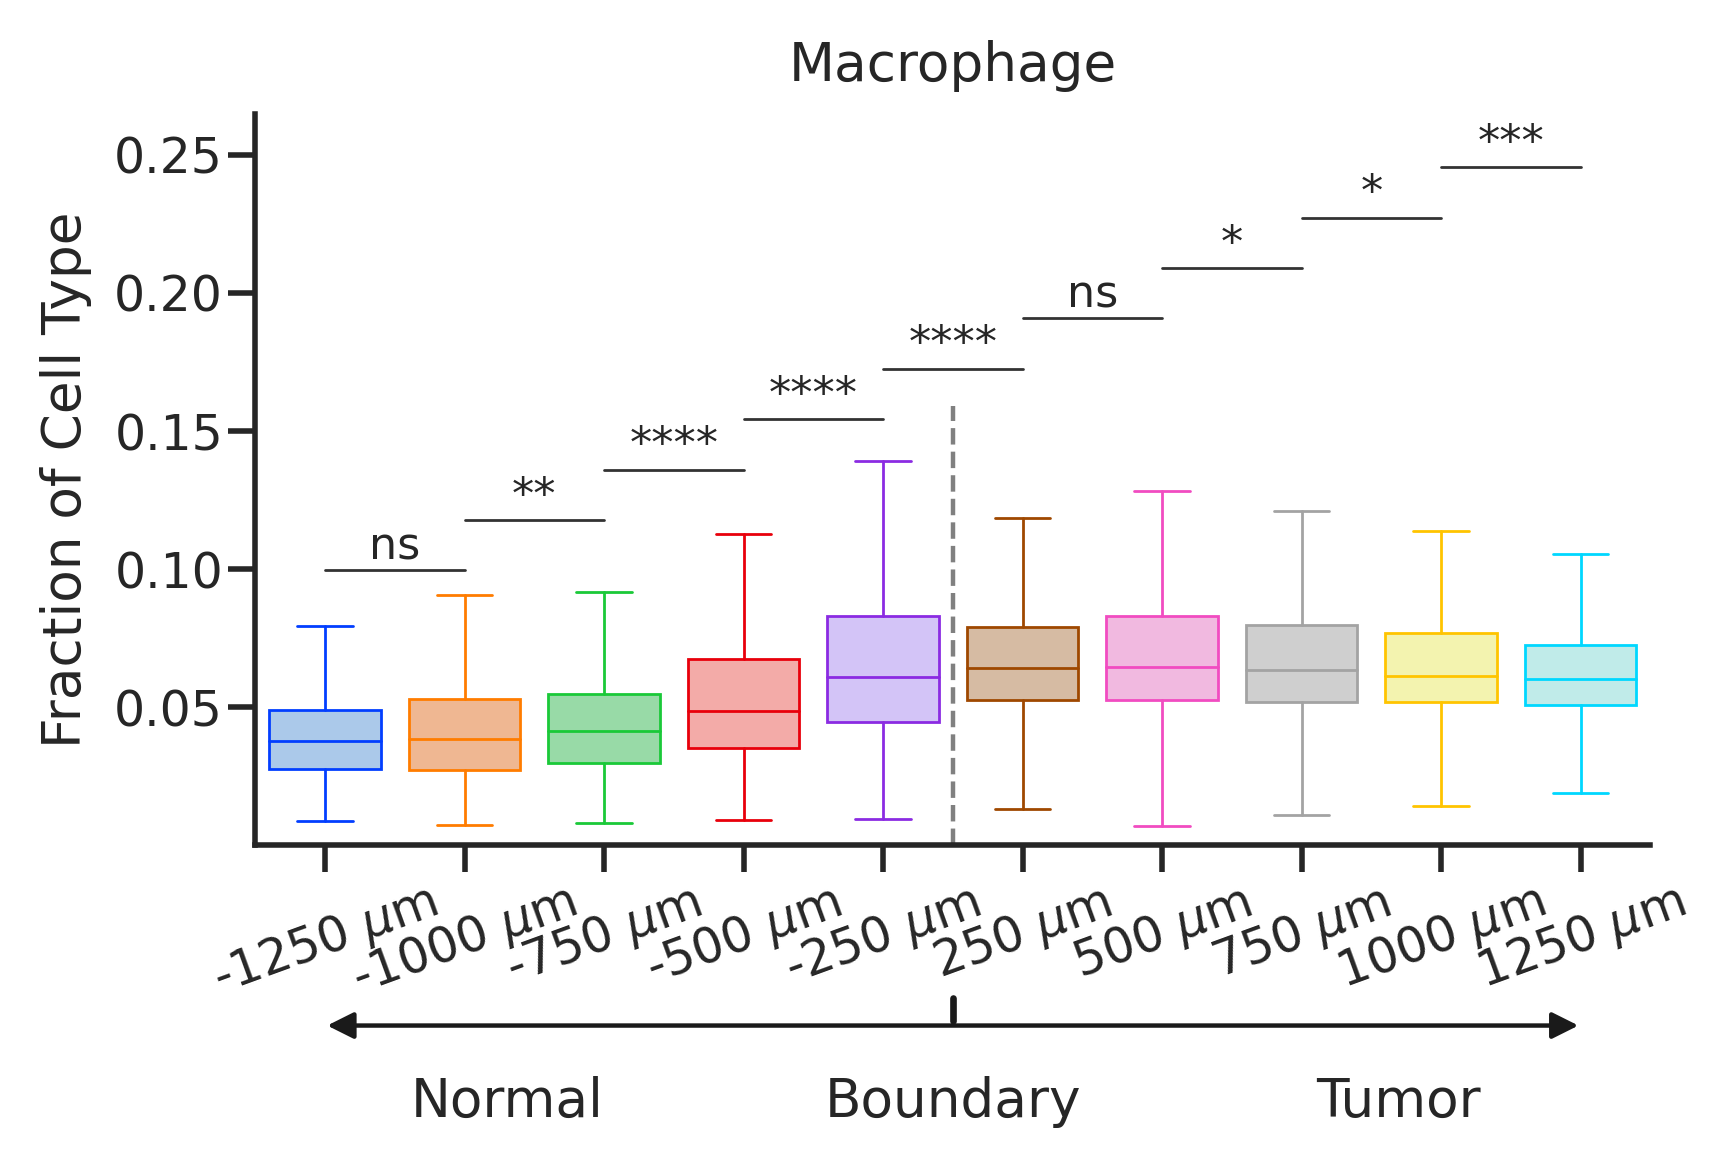

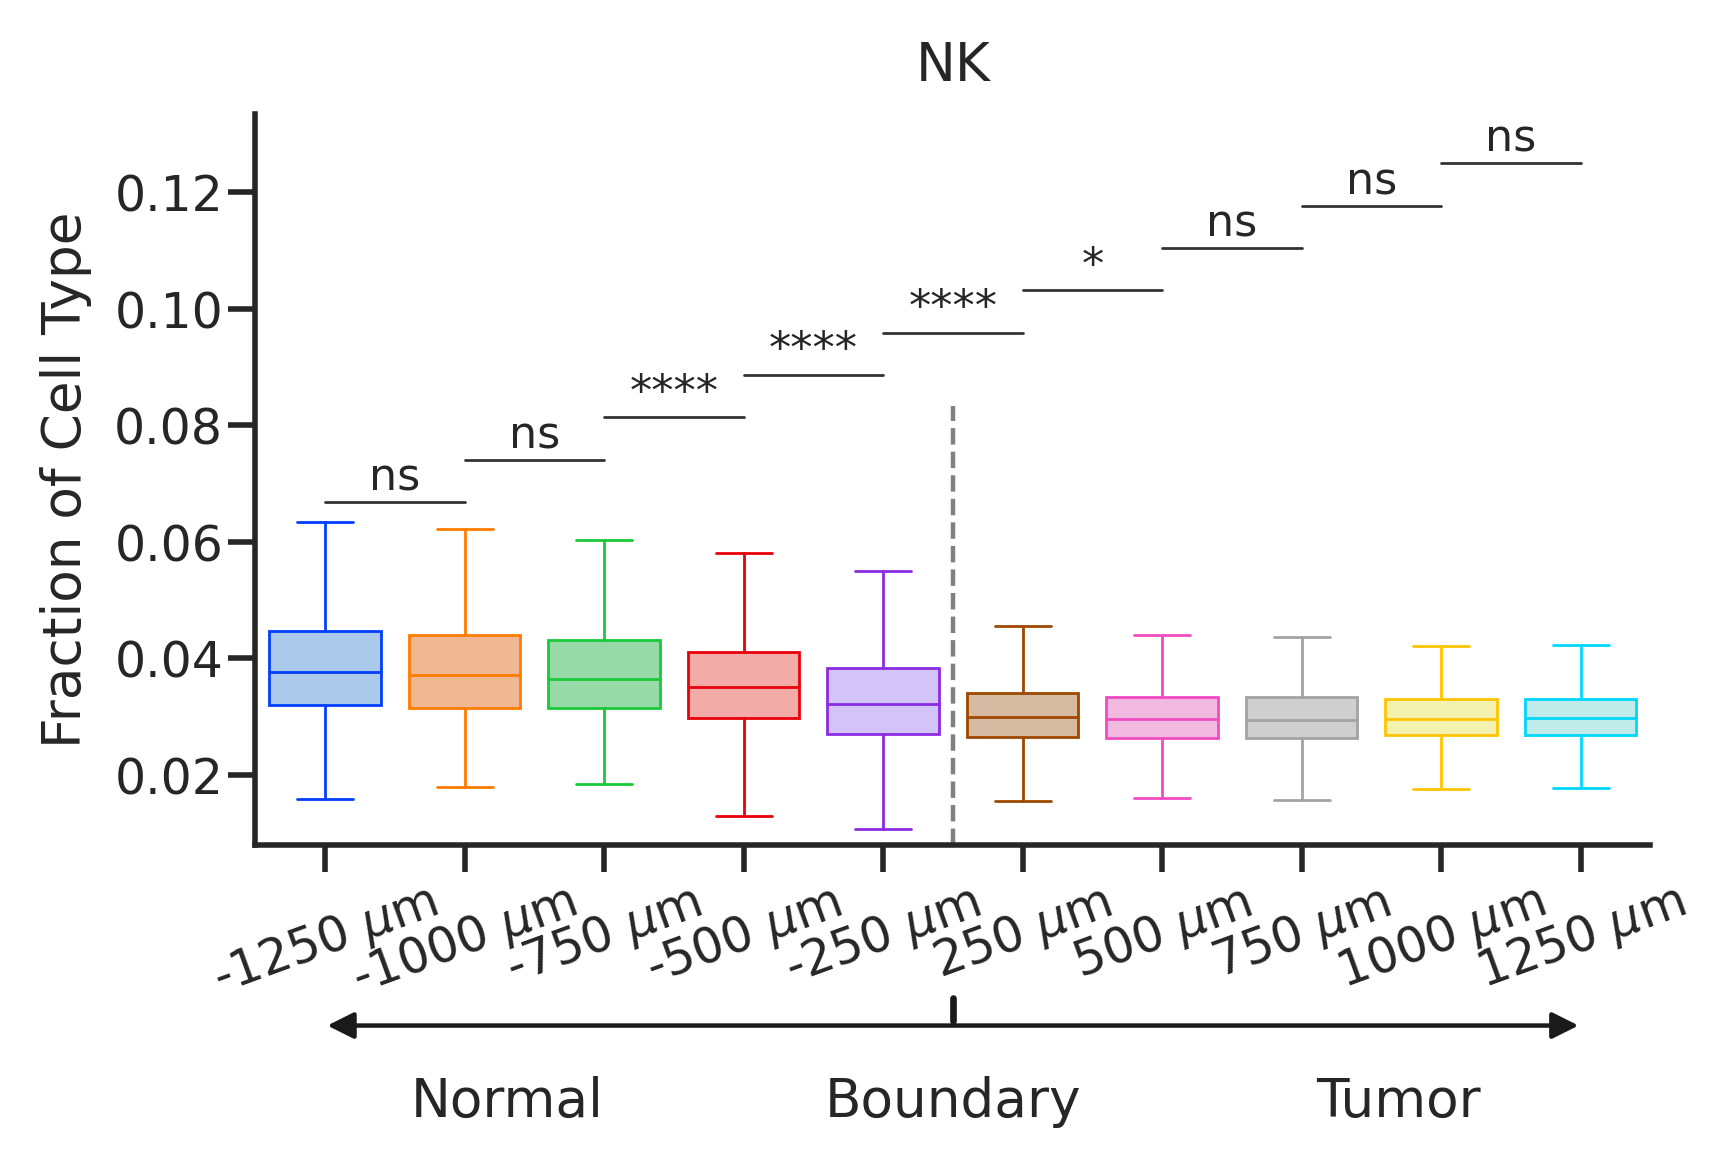

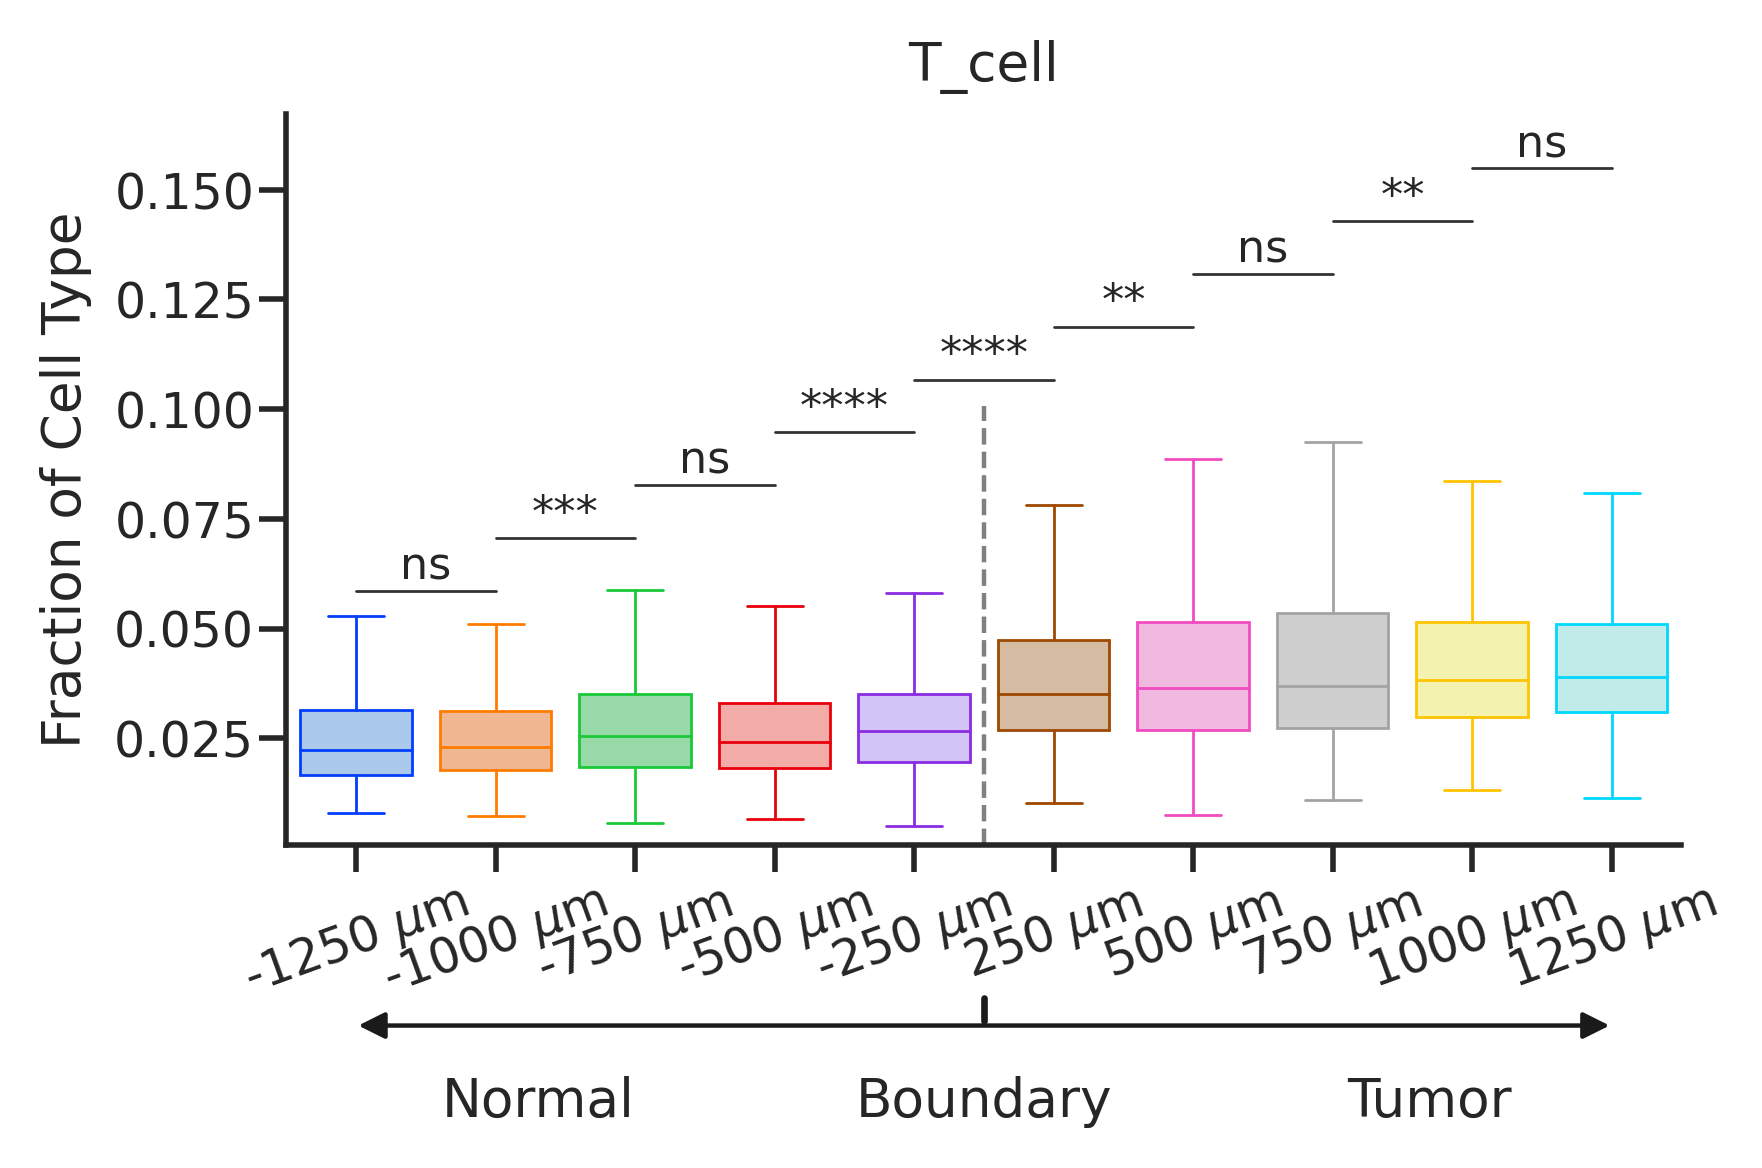

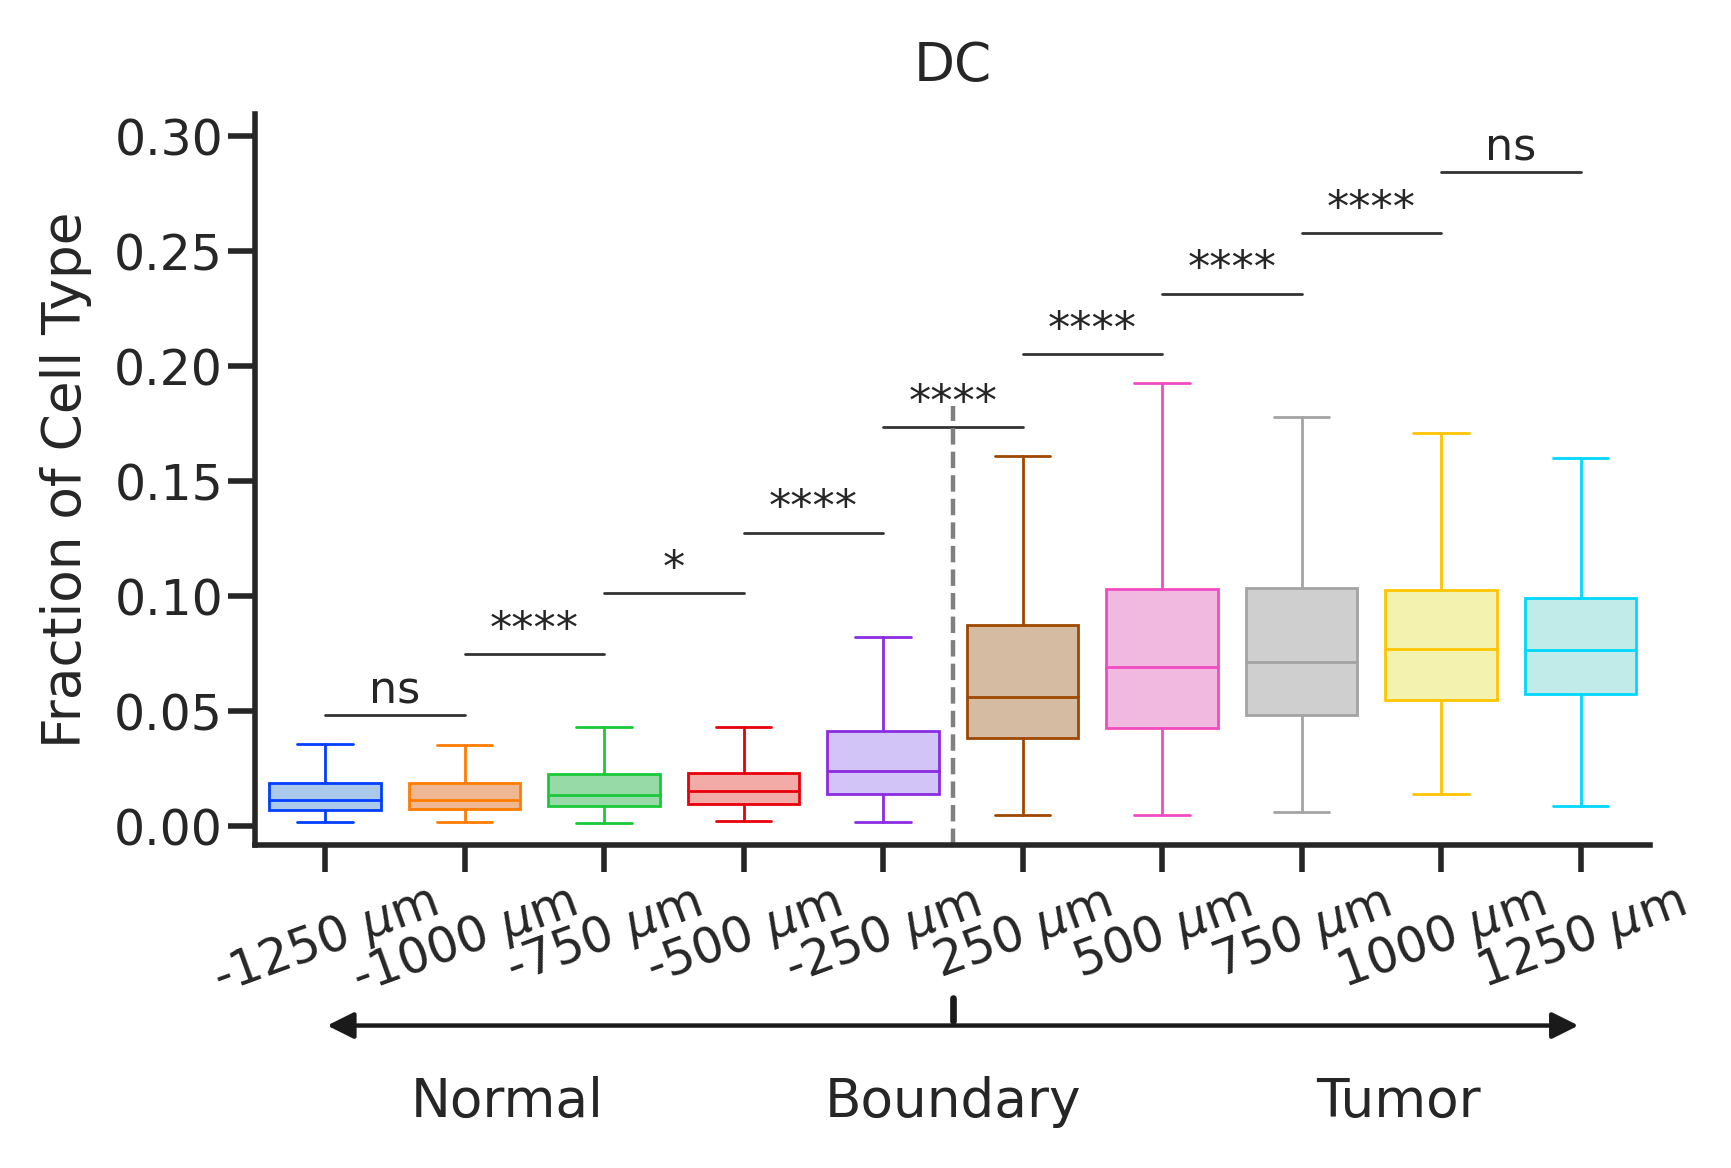

In [32]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc)

# Genes

In [53]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']

gene_dict = {'DC': ['LYZ','HLA-DRB1','IL1B','LST1','HLA-DQA1','HLA-DQB1'],
            'Fibroblast':['LUM','DCN','FBLN1','APOD','COL1A1','IGFBP6','CFD'],
            'Macrophage':['CD68','MARCO','CTSD','C1QA','C1QB','APOC1','APOE'],
            'NK':['NKG7','GZMA','GNLY','CD3G','FGFBP2'],
            'T_cell':['CD2','CD3D','CD3E','CXCR4','IL32'],
             'B_cell':['MS4A1','FKBP11', 'DERL3','CD79A','MZB1','IGHA2'], # no 'IGLL5','IGJ' in data
            'Club':['SCGB1A1','SCGB3A1','PIGR','WFDC2'],
            'Ciliated':['CAPS','TPPP3','C9orf24'],
            'Endothelial':['RAMP2','VWF','GNG11','CLDNS','DARC'],
             'AT1':['RTKN2','EMP2'],
             'AT2':['PIGR', 'WFDC2','SFTA2','NAPSA','SFTPB','SFTPD','SFTPA1','SFTPC'],
             'AT2_like': ['MDK','TIMP1','IFI27','EPCAM','SCGB3A2'],
             'Basal':['KRT15','S100A2'], # no MIR205HG 
             'Erythrocyte':['HBA1','HBA2','HBB'],
             'Granulocyte':['G0S2','S100A8','S100A9'],
             'MAST_cell':['RGS13','HPGDS','CAP3','TPSAB1'],
            }

In [56]:
adass = [adata_p5_ob.copy(), adata_p10_p5.copy(), adata_p15_p10.copy(), 
         adata_p20_p15.copy(), adata_m5_ob.copy(), adata_m10_m5.copy(), adata_m15_m10.copy(), adata_m20_m15.copy()]
dist_lab = ['0-5','5-10','10-15','15-20', '-5-0', '-10--5','-15--10','-20--15']

celltype_list = ['AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell']

celltype = 'T_cell'
df_gene=None
for i, ada in enumerate(adass):
    i_df_gene = ada[:, gene_dict[celltype]].to_df()
    i_df_gene['region'] = [dist_lab[i]] * i_df_gene.shape[0]
        
    if i==0:
        df_gene = i_df_gene
    else:
        df_gene = pd.concat([df_gene, i_df_gene], ignore_index=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.788e-01 U_stat=3.012e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.580e-01 U_stat=3.774e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.168e-03 U_stat=5.559e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.520e-07 U_stat=1.642e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.616e-08 U_stat=3.939e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.201e-02 U_stat=3.790e+06
-15--10 vs. -20--15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg cor

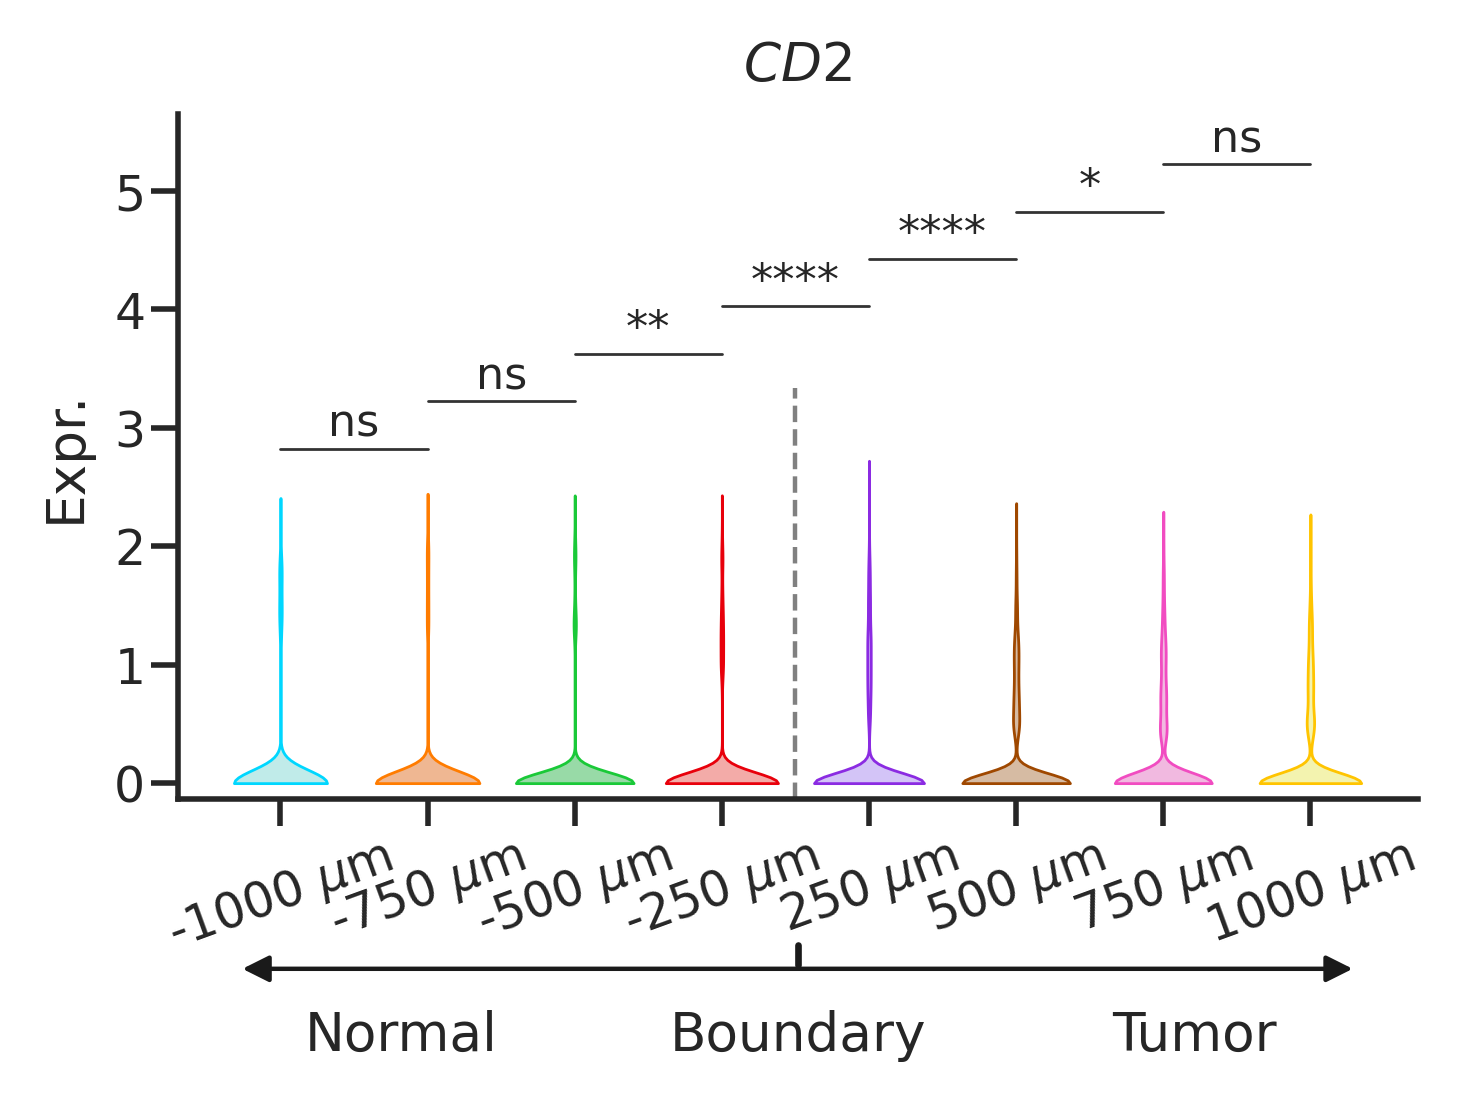

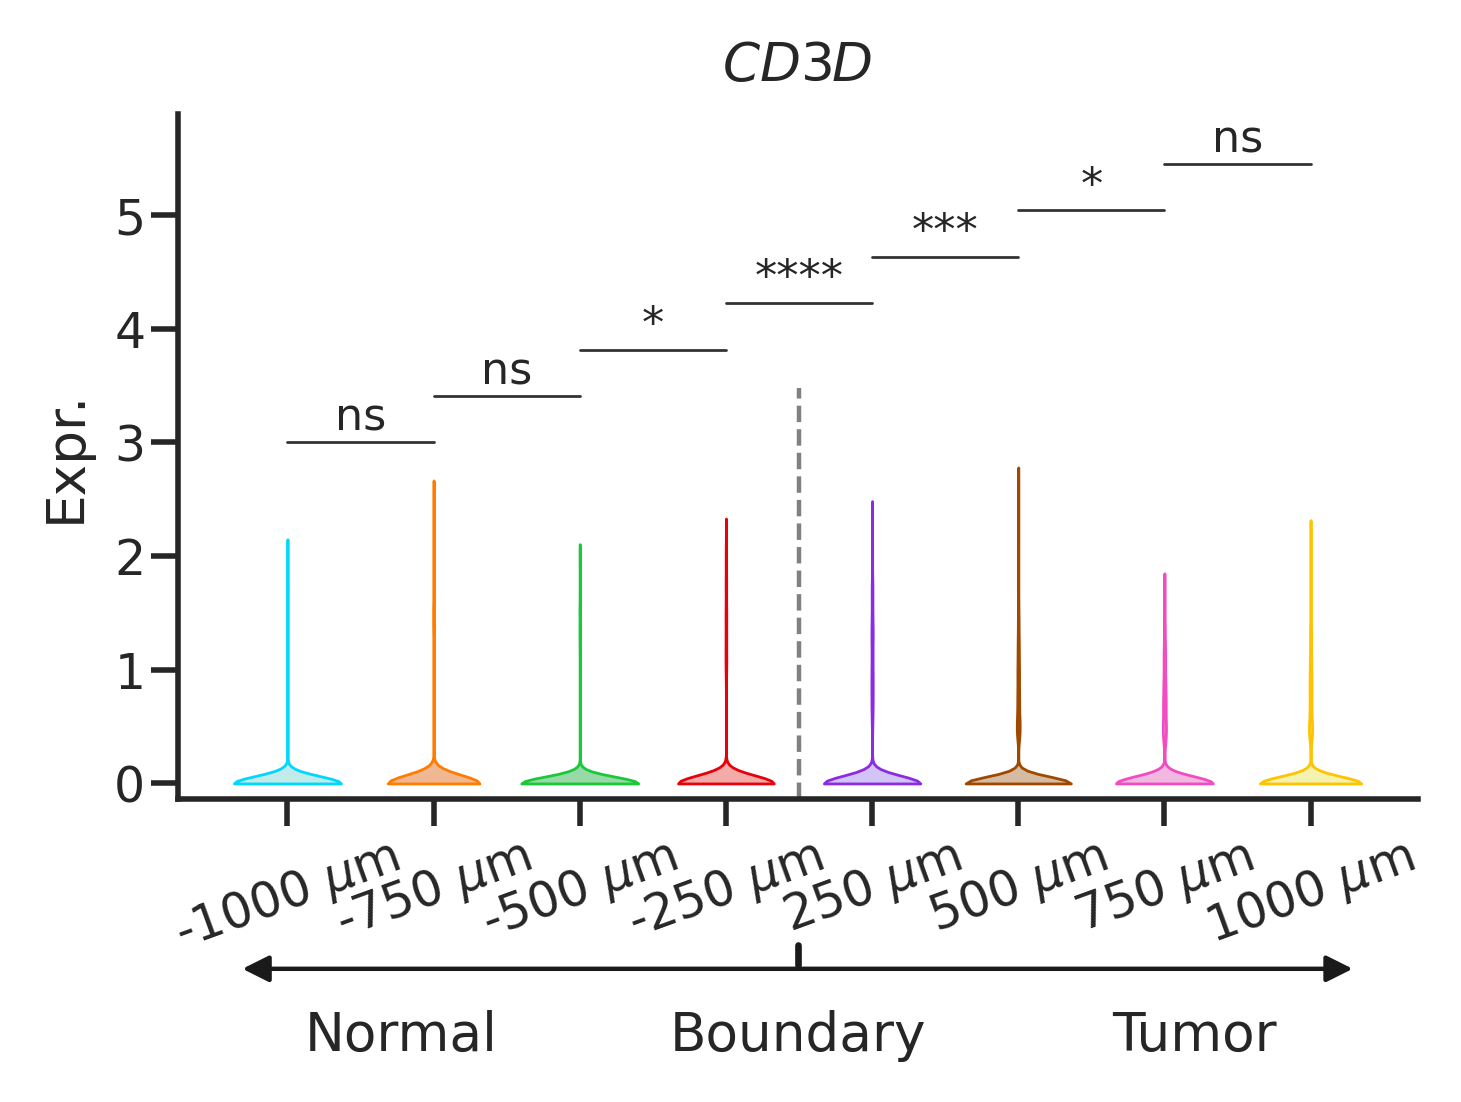

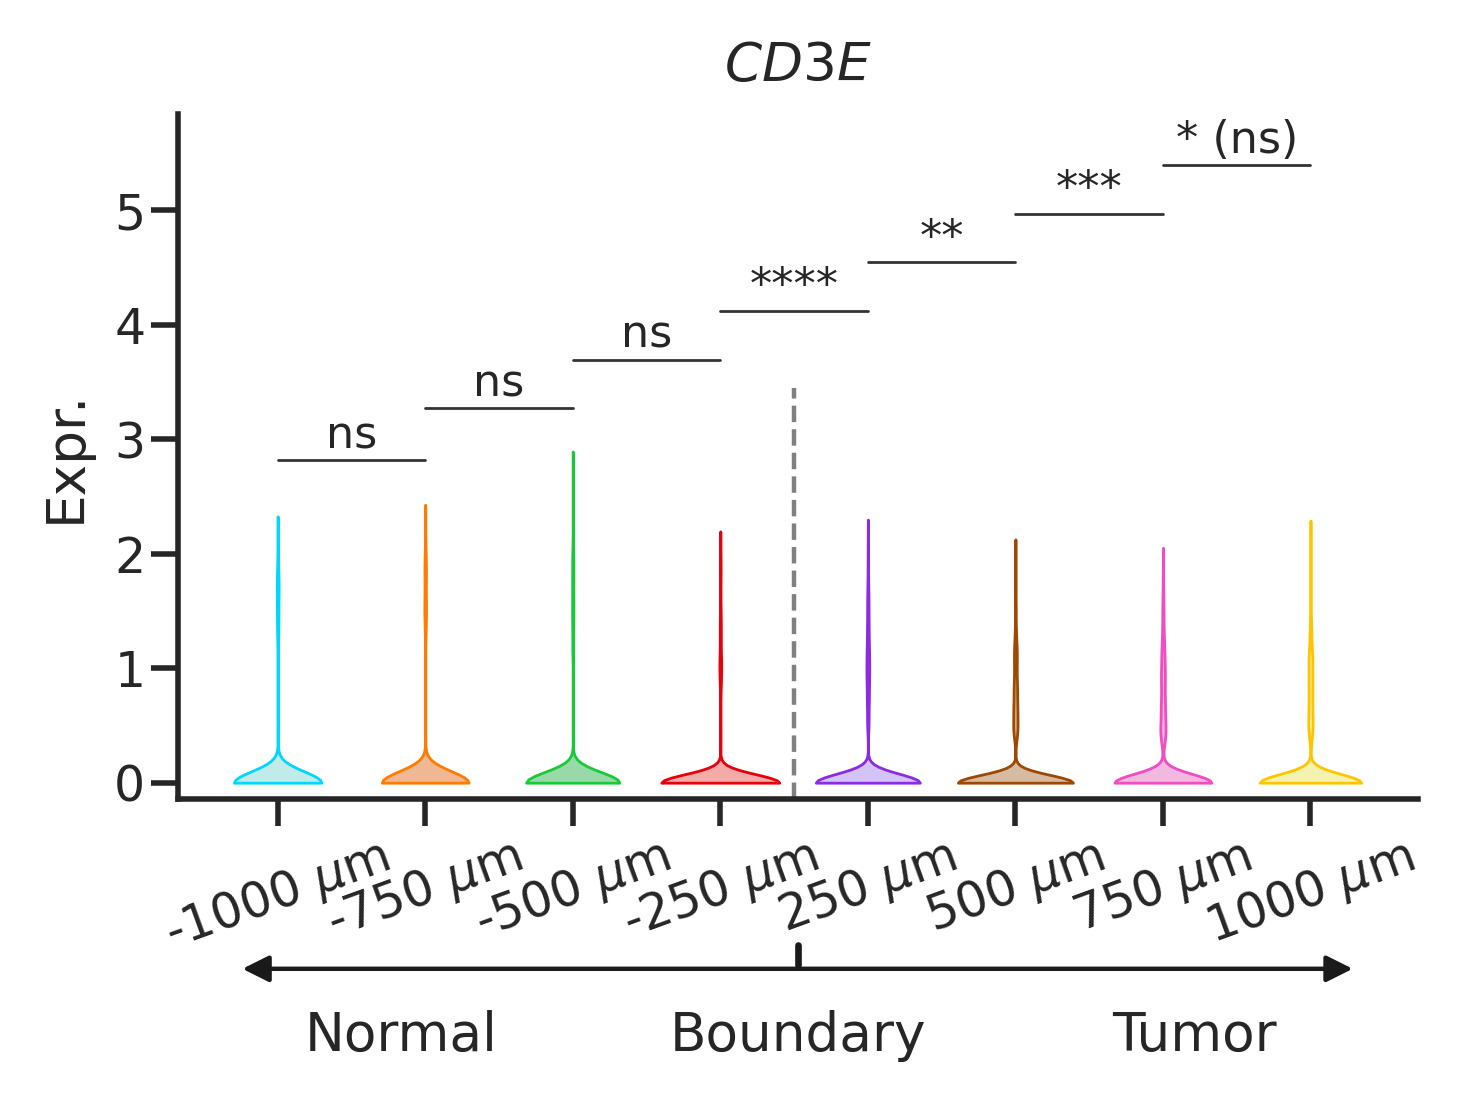

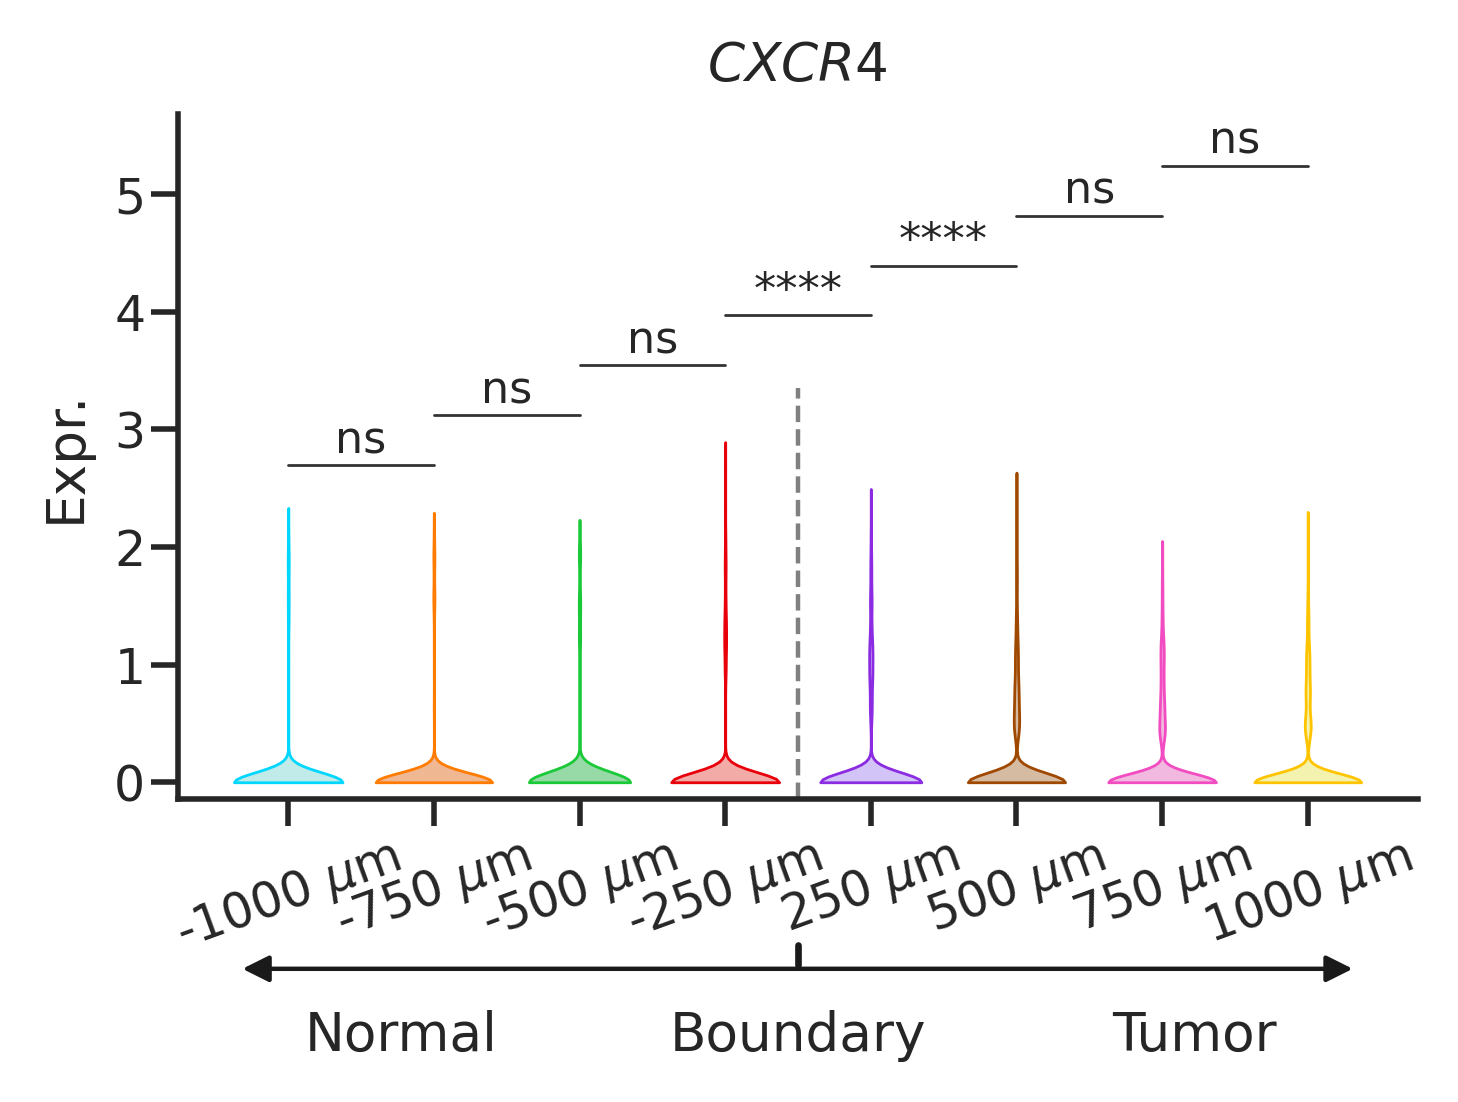

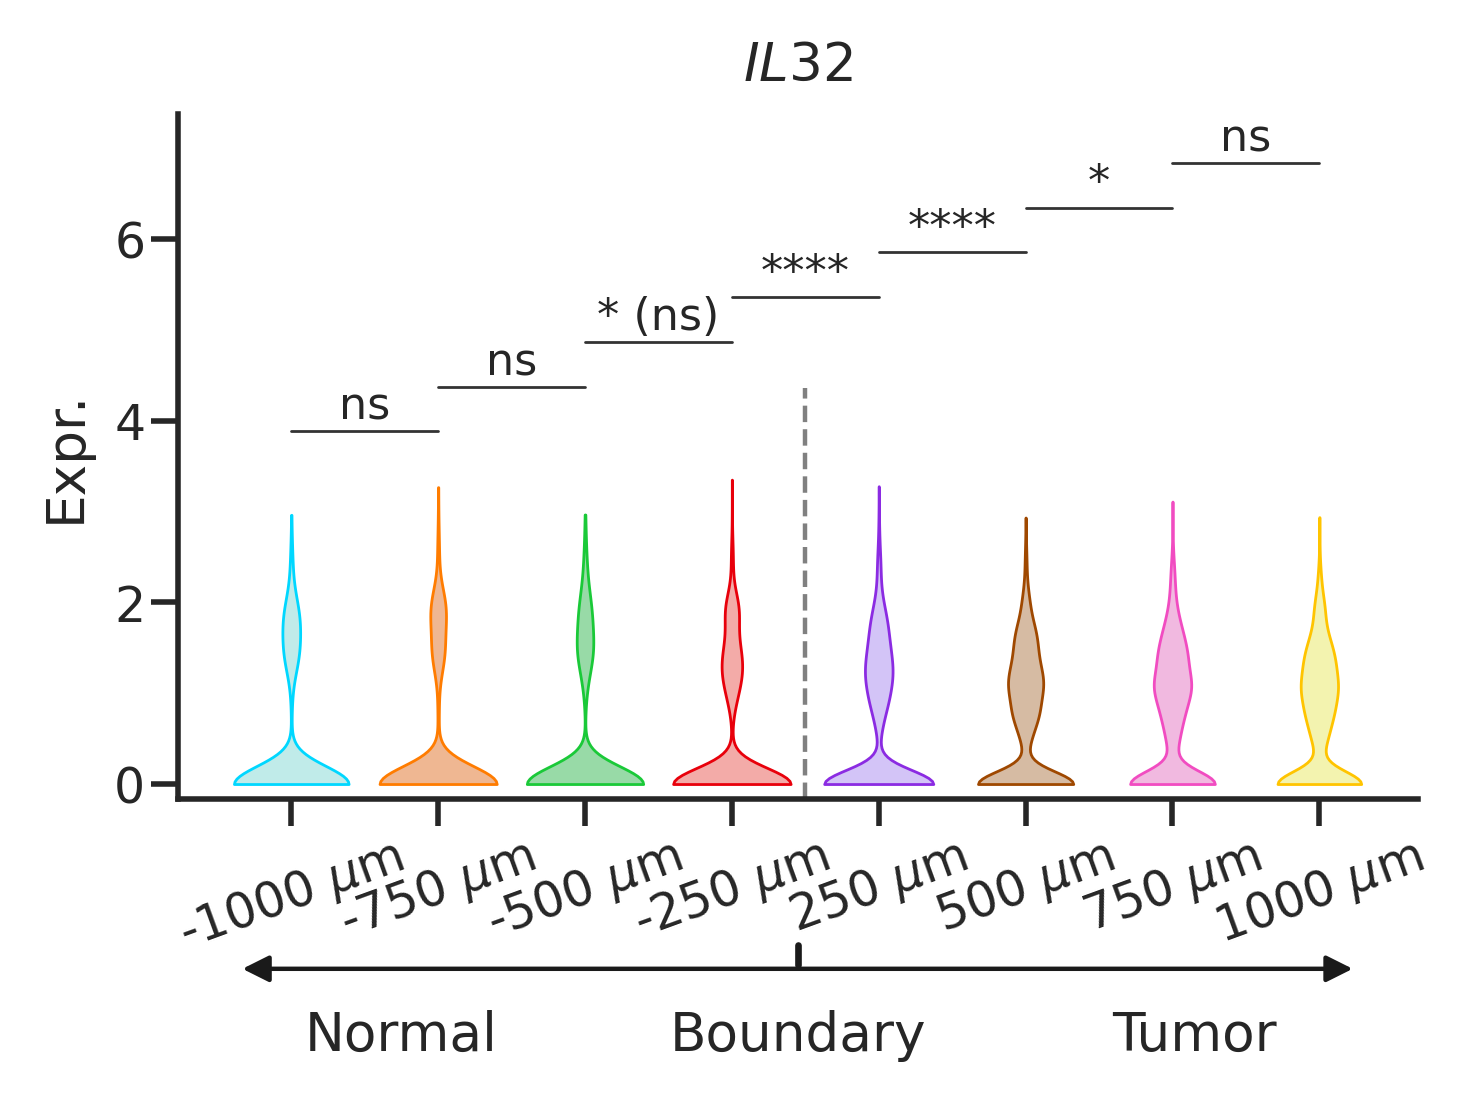

In [57]:
for gene in gene_dict[celltype]:
    plot_show(df_gene, gene, save=True,y_label='Expr.', gene=True, gene_cell_type=celltype)